In [12]:
%matplotlib inline
from random import randint
from enum import Enum
import matplotlib.pyplot as plt

In [13]:
class Strategie(Enum):
    CHANGER = 1
    GARDER = 2

In [14]:
def play_game(strategie):
    portes = [0, 1, 2]
    bonne_porte = randint(0, 2)
    premier_choix = randint(0 , 2)
    portes.remove(premier_choix)
    if premier_choix == bonne_porte:
        portes.remove(portes[randint(0,1)])
    else:
        portes = [bonne_porte]
    deuxieme_choix = 0
    if strategie == Strategie.GARDER:
        deuxieme_choix = premier_choix
    else:
        deuxieme_choix = portes[0]
    return deuxieme_choix == bonne_porte

In [15]:
play_game(Strategie.CHANGER)

False

In [16]:
def play(strategie, nb_tours):
    return [1 if play_game(strategie) else 0 for i in range(nb_tours)]

In [17]:
sum(play(Strategie.GARDER, 1000))

338

In [18]:
sum(play(Strategie.CHANGER, 1000))

663

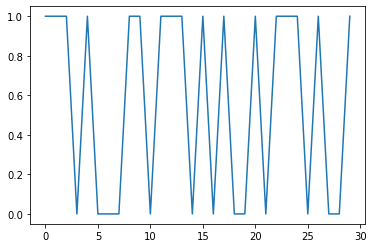

In [19]:
plt.plot(play(Strategie.CHANGER, 30))

<BarContainer object of 2 artists>

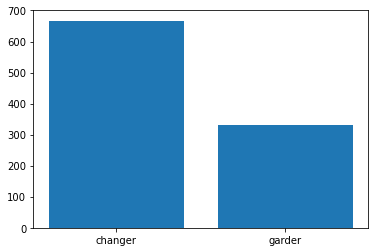

In [20]:
plt.bar([1,2],[sum(play(Strategie.CHANGER, 1000)), sum(play(Strategie.GARDER, 1000))], tick_label=["changer","garder"])

In [21]:
gains_changer = []
gains_garder = []
samples =  [1000, 10000, 20000, 50000, 80000, 100000]
for tours in samples:
    gains_changer.append(play(Strategie.CHANGER, tours))
    gains_garder.append(play(Strategie.GARDER, tours))

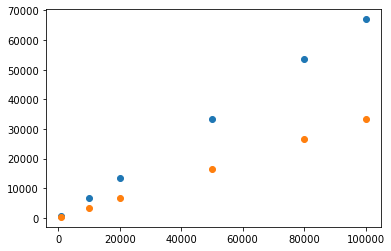

In [22]:
figure = plt.figure()
plot = plt.scatter(samples, [sum(x) for x in gains_changer])
plot = plt.scatter(samples, [sum(x) for x in gains_garder])